# Performance Portability Plots

In [297]:
import sys
!{sys.executable} -m pip install -r requirements.txt


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [298]:
from matplotlib.ticker import FuncFormatter
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import os
from pathlib import Path
from typing import List, Dict, Any, Tuple, Callable, Optional
import sys

import seaborn as sns

%matplotlib inline

In [299]:
matplotlib.style.use('seaborn-v0_8')  

In [300]:
root_dir = '/Users/diego/Documents/Studium/4_Semester/Masterarbeit/master_benchmarks/analysis/Performance_Portability/data'

plot_save_dir = './plots/'

In [301]:
hydrac = 'HYDRAC'
nebulac = 'NEBULAC'

# display_name, prefix
all_machines = [('Nebula',nebulac),('Hydra',hydrac)]

In [302]:
def get_path(*entries):
    return os.path.join(*entries)


def plot(name:str,save=True) -> None:
    name = name.replace(' ','-')
    if save:
        plt.savefig(get_path(plot_save_dir,name+".png"),bbox_inches='tight')
    plt.show()

In [303]:
def read_pp_dataframe(hypo: str, machine:str) -> pd.DataFrame:
    file_name = f'{machine.upper()}_{hypo}_pp.csv'
    df = pd.read_csv(f'{get_path(root_dir,file_name)}')
    return df 

In [304]:
def get_PP_df(hypo: str, operations: Optional[Callable[[pd.DataFrame],pd.DataFrame]] = None):
    data = []

    for display_name, prefix in all_machines:
        df = read_pp_dataframe(hypo,prefix)
        
        df.drop(df.columns.difference(['PP','name']), 1, inplace=True)
        df = df.rename(columns={'PP':display_name})


        if operations:
            df = operations(df)

        df = df.set_index(['name'])
        data.append(df)

    pp_df = data[0]

    for i in range(1,len(data)):
        pp_df = pd.merge(pp_df,data[i],on='name')
    
    return pp_df

## Speedup

### DATA

In [305]:
speed_hypos = ['H1','H3']

speed_pp = pd.concat([get_PP_df(hypo) for hypo in speed_hypos])

speed_pp

/var/folders/42/fk0jfryd1dd1ztdldncqc1cw0000gn/T/ipykernel_69708/747920851.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['PP','name']), 1, inplace=True)
/var/folders/42/fk0jfryd1dd1ztdldncqc1cw0000gn/T/ipykernel_69708/747920851.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['PP','name']), 1, inplace=True)
/var/folders/42/fk0jfryd1dd1ztdldncqc1cw0000gn/T/ipykernel_69708/747920851.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['PP','name']), 1, inplace=True)
/var/folders/42/fk0jfryd1dd1ztdldncqc1cw0000gn/T/ipykernel_69708/747920851.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except f

,Nebula,Hydra
name,,
b1_1_for_each_linear,0.651258,0.787552
b1_2_for_each_quadratic,0.784891,0.748501
b1_4_for_each_exponential,0.055114,0.416236
b1_1_for_each_linear_mandelbrot,0.330107,0.399051
b1_2_for_each_quadratic_mandelbrot,0.721957,0.698417


### Plot

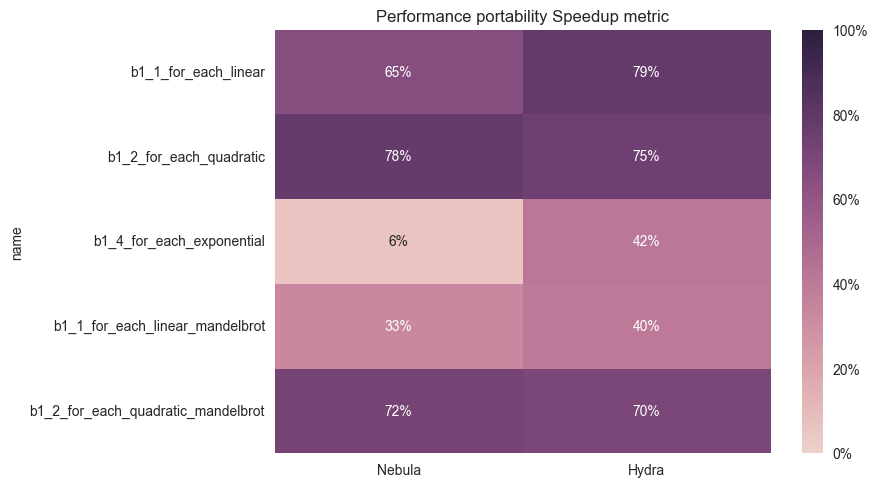

In [306]:
fmt = lambda x,pos: '{:.0%}'.format(x)
sns.heatmap(speed_pp, annot=True,cmap=sns.cubehelix_palette(as_cmap=True),vmin=0,vmax=1,cbar_kws={'format': FuncFormatter(fmt)},fmt='.0%',)

plt.title(f'Performance portability Speedup metric')

plot(f'Performance portability Speedup metric')

## Bps

### DATA

In [311]:
bsp_hypos = ['H4']

bps_pp = pd.concat([get_PP_df(hypo) for hypo in bsp_hypos])

bps_pp


/var/folders/42/fk0jfryd1dd1ztdldncqc1cw0000gn/T/ipykernel_69708/747920851.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['PP','name']), 1, inplace=True)
/var/folders/42/fk0jfryd1dd1ztdldncqc1cw0000gn/T/ipykernel_69708/747920851.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['PP','name']), 1, inplace=True)


,Nebula,Hydra
name,,
B4_1,0.293100,0.246422
B4_2_already_sorted,0.035507,0.327244
B4_2_decrement_sorted,0.039425,0.807988
B4_2_not_sorted,0.043797,0.628399
b4_3_one_empty,0.867175,0.830115
b4_3_wholly_greater,0.297941,0.256195
b4_3_front_overhang,0.677273,0.866313
b4_4_left_empty,0.995286,0.953902
b4_4_right_empty,0.884667,0.841641


### Plot

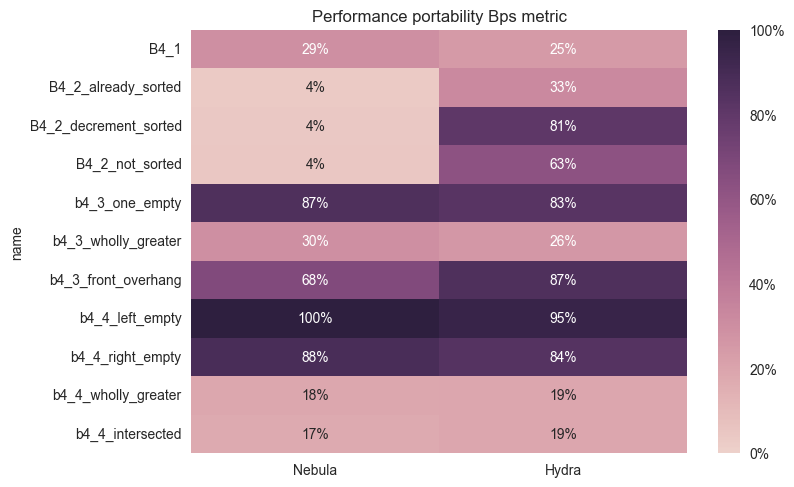

In [312]:
fmt = lambda x,pos: '{:.0%}'.format(x)
sns.heatmap(bps_pp, annot=True,cmap=sns.cubehelix_palette(as_cmap=True),vmin=0,vmax=1,cbar_kws={'format': FuncFormatter(fmt)},fmt='.0%',)

plt.title(f'Performance portability Bps metric')

plot(f'Performance  portability Bps metric')

## Runtime

### DATA

In [309]:
runtime_hypos = ['H5','H6','H7_REDUCED','H8']

runtime_pp = pd.concat([get_PP_df(hypo) for hypo in runtime_hypos])

runtime_pp


/var/folders/42/fk0jfryd1dd1ztdldncqc1cw0000gn/T/ipykernel_69708/747920851.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['PP','name']), 1, inplace=True)
/var/folders/42/fk0jfryd1dd1ztdldncqc1cw0000gn/T/ipykernel_69708/747920851.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['PP','name']), 1, inplace=True)
/var/folders/42/fk0jfryd1dd1ztdldncqc1cw0000gn/T/ipykernel_69708/747920851.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['PP','name']), 1, inplace=True)
/var/folders/42/fk0jfryd1dd1ztdldncqc1cw0000gn/T/ipykernel_69708/747920851.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except f

,Nebula,Hydra
name,,
b5_1_find_first_entry,0.733743,0.544936
b5_1_find_last_entry,0.428797,0.559496
b5_1_find_non_existing,0.441176,0.662605
b5_2_partition,0.033414,0.089660
b5_3_unique_copy,0.127524,0.122115
b5_4_minmax_element_all_equal,0.446017,0.263432
b5_4_minmax_element_increasing,0.481193,0.292974
b6_1_inclusive_scan,0.364243,0.315675
b6_2_exclusive_scan,0.349065,0.313625


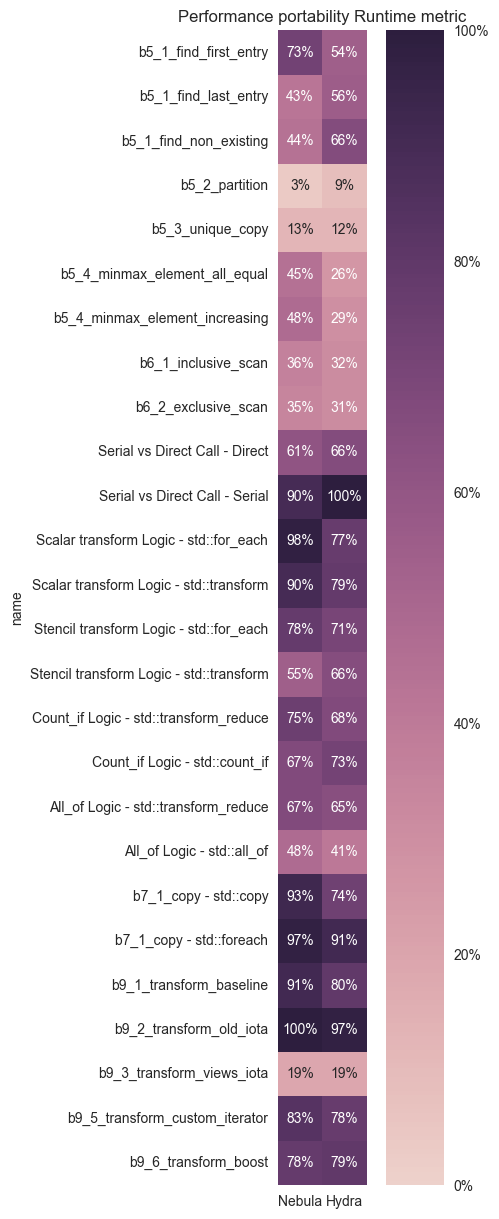

In [310]:
fig, ax = plt.subplots(figsize=(5,15))     # width , height     

fmt = lambda x,pos: '{:.0%}'.format(x)
sns.heatmap(runtime_pp, annot=True,cmap=sns.cubehelix_palette(as_cmap=True),vmin=0,vmax=1,cbar_kws={'format': FuncFormatter(fmt)},fmt='.0%',square=True,ax=ax,)

plt.title(f'Performance portability Runtime metric')

plot(f'Performance  portability Runtime metric')